In [1]:
from math import sin, sqrt, exp, cos
import matplotlib.pyplot as plt
from rk6 import rk_defect_control_perfect_first_step, rk_defect_control, rk_defect_control_static_alpha, rk_defect_control_perfect_first_step_smooth

In [2]:
def create_t_eval(start, end, num_points = 100):
    res = [start]
    h = (end - start)/(num_points - 1)

    for _ in range(num_points - 1):
        res.append(
            res[-1] + h
        )
    return res

In [3]:
def experiment(model, y0, t_span, solution):
    t_eval = create_t_eval(t_span[0], t_span[1])
    tol = 1e-6
    # (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step(model, t_span, y0[0], tol, solution)
    (res, sol, first_deriv, derivs) = rk_defect_control_perfect_first_step_smooth(model, t_span, y0[0], tol, solution)
    # (res, sol, first_deriv, derivs) = rk_defect_control_static_alpha(model, t_span, y0[0], tol, solution)
    print("integration complete")

    # ====================================== figure of rk6 vs rk6_interps vs rk45
    # plt.figure()
    xs = [x[0] for x in res]
    # ys = [x[1] for x in res]
    # plt.plot(xs, ys, label="rk6")

    # plots of where the end of the steps occured to look at the interp
    for this_x in xs:
        plt.axvline(x=this_x) 

    computed_solutions = [sol(x) for x in t_eval]
    plt.plot(t_eval, computed_solutions, label="rk6_interpolated")

    actual_solutions = solution(t_eval)
    plt.plot(t_eval, actual_solutions, label="solution")

    # removed rk45 plt.title("solution vs rk45 vs rk6 vs rk6_interpolated")
    plt.title("solution vs rk6_interpolated")
    plt.xlabel("t")
    plt.ylabel('y')
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end figure of rk6 vs rk6_interps vs rk45

    # ====================================== global error
    plt.figure()
    error = [(computed_solution - actual_solution) for (computed_solution, actual_solution) in zip(computed_solutions, actual_solutions)]
    for this_x in xs:
        plt.axvline(x=this_x) 
    plt.plot(t_eval, error, label="global error")
    plt.title("global error")
    plt.xlabel("t")
    plt.ylabel("error")
    plt.legend(loc="upper right")
    plt.show()
    # ====================================== end of global error

    # ====================================== figure of satisfying global defect
    actual_f_evals = [model(x, solution([x])[0])[0] for x in t_eval]
    hb_prime_evals = [first_deriv(x) for x in t_eval]
    plt.figure()
    plt.plot(t_eval, actual_f_evals)
    plt.plot(t_eval, hb_prime_evals)
    plt.title(f"first derivative for tol={tol}")
    plt.show()

    defects = [abs(actual_f_eval - hb_prime_eval) for (actual_f_eval, hb_prime_eval) in zip(actual_f_evals, hb_prime_evals)]
    plt.figure()
    plt.plot(t_eval, defects)
    plt.title(f"global defect for tol={tol}")
    plt.show()
    
    # ====================================== end figure of satisfying global defect

    # ====================================== figure of defect shape

    minimum_step_size = 0.01
    defects_small_steps = []
    plt.figure()
    for (x_i_minus_1, x_i, x_i_plus_1, hb) in derivs:
        num_points = 100
        pts_to_sample = create_t_eval(x_i, x_i_plus_1, num_points)
        defects = []
        for pt in pts_to_sample:
            y = solution([pt])[0]
            f_eval  = model(pt, y)[0]
            hb_prime_eval = hb.prime(pt)
            defects.append( abs(hb_prime_eval - f_eval) )
        maximum_defect = max(defects)
        # minimum_defect = min(defects)
        # plot_vals = [(defect - minimum_defect) / (maximum_defect - minimum_defect) for defect in defects]
        plot_vals = [ defect/ maximum_defect for defect in defects]
        #plt.plot(xs, defects, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
        x_axis = [i/(num_points - 1) for i in range(num_points)]

        if (x_i_plus_1 - x_i < minimum_step_size):
            defects_small_steps.append([x_axis, plot_vals])
            continue
        plt.plot(x_axis, plot_vals, label=f"x_{str(x_i_minus_1)}_{str(x_i_plus_1)}")
    plt.title("plot of defects")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    # plt.legend()
    plt.show()
    # ====================================== end figure of defect

    # ====================================== defects on small steps
    plt.figure()
    for [x_axis, plot_vals] in defects_small_steps:
        plt.plot(x_axis, plot_vals)
    plt.title("plot of defects on small step sizes")
    plt.xlabel("x_i to x_i_plus_1")
    plt.ylabel('defect/(max_defect on x_i to x_i_plus_1)')
    plt.show()

    # ========================================================= end of steps error vs interpolant error
    for (x, y) in res:
        print(abs(y - solution([ x ])[0]))

tolerance= 1e-06
alpha values [0.5, 1.0, 0.49999999999999983, 1.0000000000000002, 0.9999999999999997, 0.5000000000000002, 2.000000000000001, 0.49999999999999967, 1.0000000000000007]
n_steps 32
n_successful_steps 26

integration complete


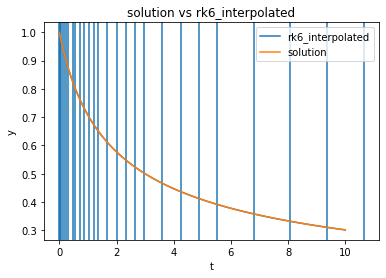

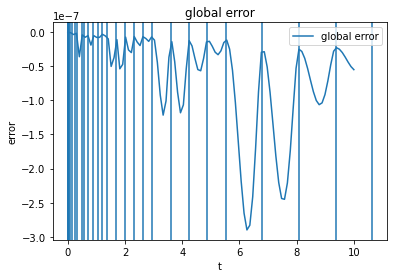

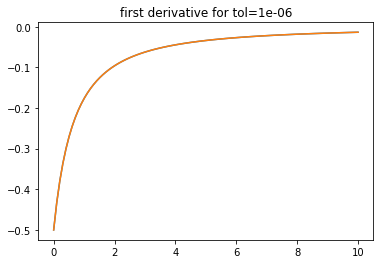

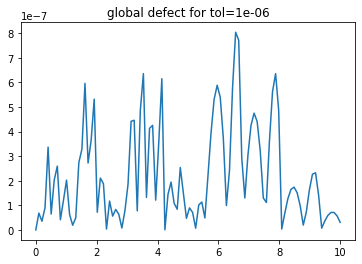

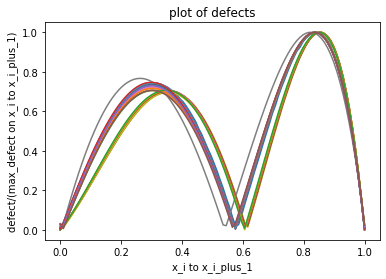

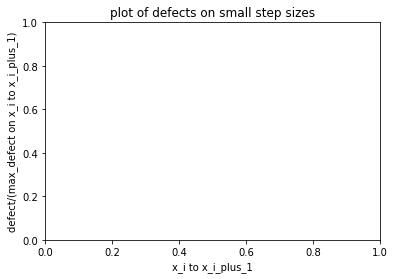

0.0
0.0
1.1102230246251565e-15
6.572520305780927e-14
3.496092304544618e-12
1.6197798657913154e-10
2.475412097524554e-10
2.9149949121176633e-10
2.710788704618494e-09
2.526392983703829e-09
3.0536174699946628e-09
3.144777105390517e-09
3.0521687399698294e-09
2.8865826395829686e-09
2.6980631062656357e-09
5.710710571094069e-09
6.409906938564802e-09
6.293141785462808e-09
5.899360111527585e-09
5.433146044175885e-09
1.1511304687239488e-08
1.2351002998123306e-08
1.1682475320462515e-08
1.0636733105418017e-08
2.4250395191938168e-08
2.4867603365397173e-08
2.2613564798490415e-08
1.9969111864082123e-08


In [4]:
t_span_1 = [0, 10]
y0_1 = [1]

def model1(t, y):
    return [(-1/2) * y**3]

def solution1(t):
    return [1/sqrt(1+x) for x in t]

experiment(model1, y0_1, t_span_1, solution1)

tolerance= 1e-06
alpha values [0.5, 1.0, 2.0000000000000013, 0.9999999999999997, 1.0000000000000002, 0.49999999999999967, 1.0000000000000007, 0.9999999999999987, 0.5000000000000007]
n_steps 48
n_successful_steps 38

integration complete


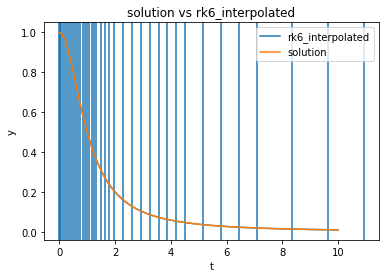

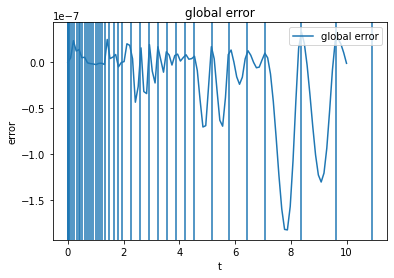

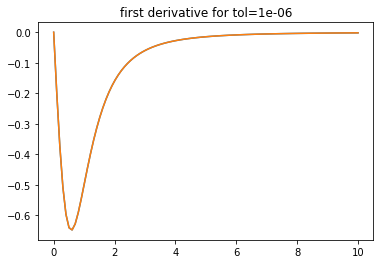

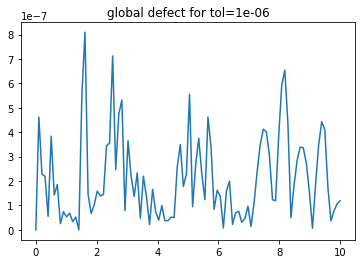

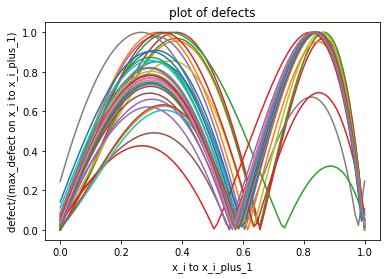

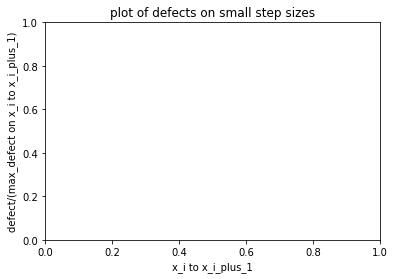

0.0
0.0
3.6193270602780103e-14
2.3400170690024424e-12
1.4594769837117383e-10
8.402955331554551e-09
1.3654655628414503e-08
1.5377879636346847e-08
1.4142062743083272e-08
1.3335196058505971e-08
9.781076282244783e-09
6.0762529452418335e-09
2.8697096920993204e-09
4.3246506375993476e-10
1.224218393325316e-09
2.222650286043404e-09
2.7271023217423362e-09
2.8927430451020086e-09
2.844529445322763e-09
2.673653021201261e-09
2.442095692334334e-09
7.0658036088744325e-09
6.978321309691893e-09
5.593442431450768e-09
4.1257041671904915e-09
1.2012968120256318e-08
1.948366085136044e-08
1.989997691631551e-08
1.750892054952491e-08
1.4493538591509036e-08
1.1694635183856494e-08
9.351338328689174e-09
7.472036968325657e-09
1.751825477736002e-08
1.6310593761031944e-08
1.3085374849647335e-08
1.0073012049471863e-08
3.3683918012478165e-08
2.734131850784527e-08
1.9458242949202398e-08


In [5]:
t_span_2 = [0, 10]
y0_2 = [1]

def model2(t, y):
    return [-2*t*y**2]

def solution2(t):
    return [1/(1+x**2) for x in t]

experiment(model2, y0_2, t_span_2, solution2)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.5000000000000002, 1.0000000000000002, 1.9999999999999996, 1.0000000000000007, 2.0000000000000013, 0.49999999999999967, 0.9999999999999987, 0.5000000000000007]
n_steps 26
n_successful_steps 18

integration complete


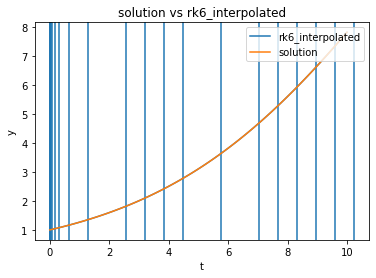

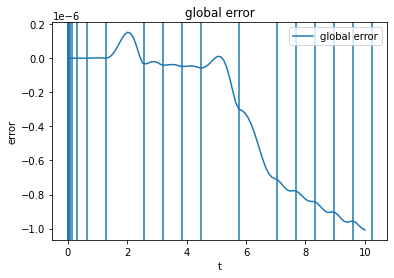

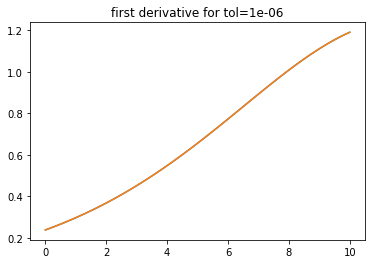

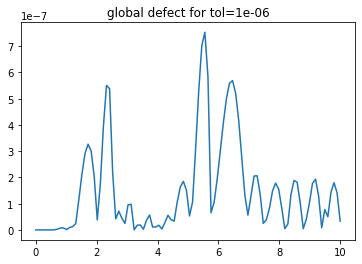

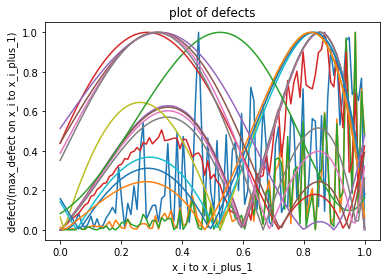

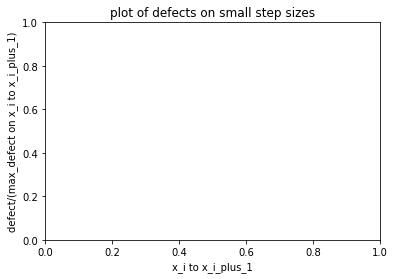

0.0
0.0
2.220446049250313e-16
2.220446049250313e-16
0.0
4.440892098500626e-16
2.864375403532904e-14
2.48334686148155e-12
2.6607627212626994e-10
3.5040432777577735e-08
4.122501806591572e-08
4.863003155719525e-08
5.7436762901375005e-08
2.9926480493713825e-07
7.114604567703964e-07
7.781736552914253e-07
8.42656148414278e-07
9.023780096484302e-07
9.546050447895027e-07
9.966199385758046e-07


In [6]:
t_span_3 = [0, 10]
y0_3 = [1]

def model3(t, y):
    return [(1/4)*y*(1 - y/20)]

def solution3(t):
    return [20 / ( 1 + 19 * exp(-x/4) ) for x in t]

experiment(model3, y0_3, t_span_3, solution3)

tolerance= 1e-06
alpha values [0.49999999999999967, 1.0, 2.0000000000000004, 3.999999999999999, 0.5, 1.0000000000000007, 0.9999999999999987, 2.0, 8.000000000000004, 0.5000000000000028, 1.000000000000011, 1.0000000000000444, 2.0000000000000444, 1.0000000000000888, 1.9999999999996447, 0.5000000000000056, 0.9999999999999556, 0.4999999999999556, 0.9999999999999112, 0.5000000000000222, 0.4999999999999778, 1.0000000000000222, 0.5000000000000888, 0.9999999999999889, 0.4999999999999889, 0.5000000000000444, 0.49999999999999445, 0.9999999999998224]
n_steps 3378
n_successful_steps 1780

integration complete


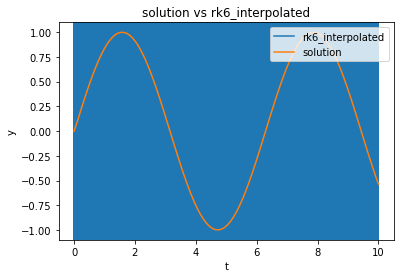

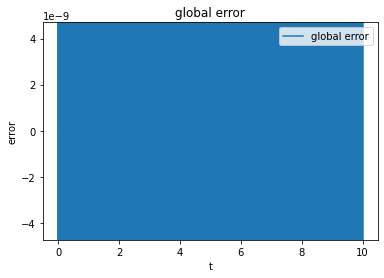

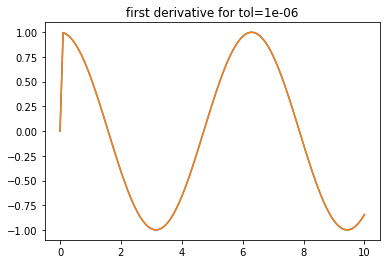

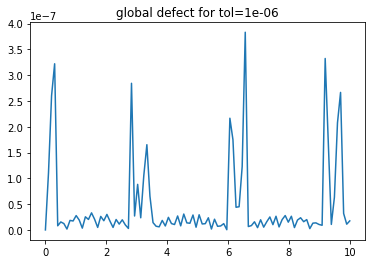

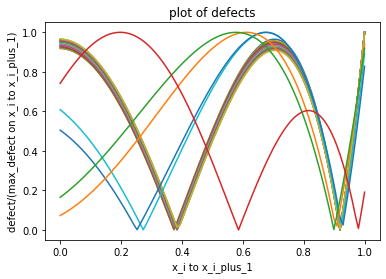

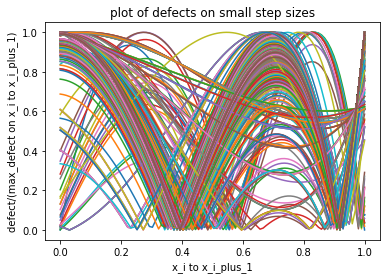

0.0
0.0
9.03307810495857e-13
1.5943210293634102e-12
4.5235078703631526e-11
6.949542503964512e-11
8.081727127795535e-11
8.373757243163027e-11
8.142037738467778e-11
7.604131213589937e-11
6.906880276047467e-11
5.046683869414093e-10
5.884575951520254e-10
5.30096348760889e-10
4.2874075817378454e-10
3.275153204196357e-10
2.4227093942119637e-10
1.7635240490143644e-10
1.343480299231814e-09
1.4064124448376347e-09
1.3573692725366016e-09
1.375375549561575e-09
1.4578175611124067e-09
1.5785247553523618e-09
1.7185855238910364e-09
1.8676253044080937e-09
2.020606848507356e-09
2.1751549450499397e-09
2.330253462412557e-09
2.485436578769651e-09
2.640467317016615e-09
2.795303433167362e-09
2.9499040710145863e-09
3.1041718084878767e-09
3.2581457809488512e-09
3.411806337449974e-09
3.5651418206494867e-09
3.7180851730767017e-09
3.870676890116442e-09
4.0228870790137705e-09
4.174672996182238e-09
4.326070612847843e-09
4.477032411465132e-09
2.7548383574327318e-09
4.04128980280305e-09
2.492421824484836e-09
4.086383

In [7]:
t_span_4 = [0, 10]
y0_4 = [0]

def model4(t, y):
    return [100 * (sin(t) - y)]
    # return [10 * (sin(t) - y)]

def solution4(t):
    return [( 100 * ( exp(-100 * x) - cos(x) ) +  10000 * sin(x) ) / 10001 for x in t]
    # return [( 10 * ( exp(-10 * x) - cos(x) ) +  100 * sin(x) ) / 101 for x in t]

experiment(model4, y0_4, t_span_4, solution4)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.49999999999999983, 1.0000000000000002, 0.9999999999999997, 0.5000000000000002, 2.000000000000001, 0.49999999999999967, 1.0000000000000007, 0.9999999999999987, 1.9999999999999973, 2.0, 2.0000000000000444, 1.9999999999996447, 1.000000000000011, 1.0000000000000222, 0.5000000000000028, 0.5000000000000888, 0.9999999999999889, 0.4999999999999889, 0.49999999999999445, 0.9999999999998224]
n_steps 1633
n_successful_steps 1035

integration complete


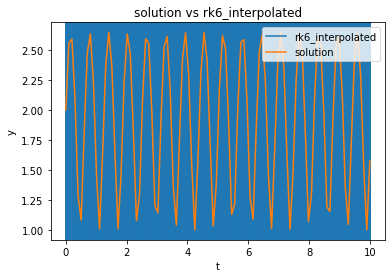

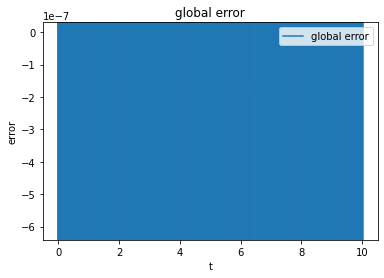

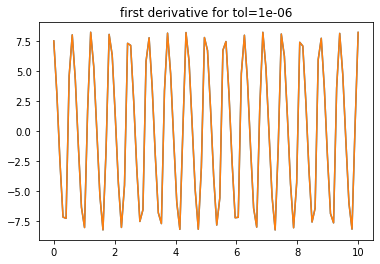

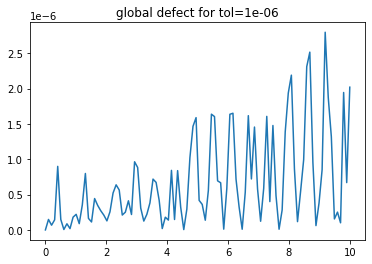

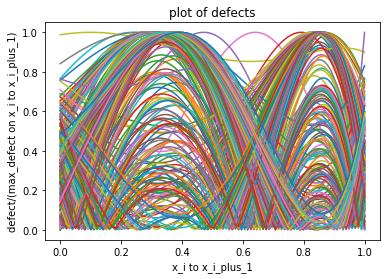

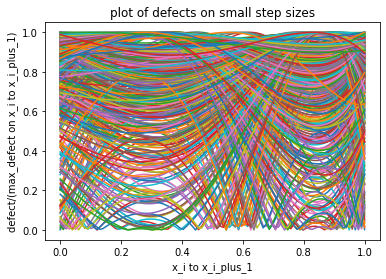

0.0
0.0
4.055111801903877e-11
7.463141216135227e-11
1.035846963759468e-10
1.8279506797114209e-09
1.813268646344568e-09
3.0554656582637563e-09
4.1242009807263e-09
5.105230460600296e-09
6.061072532759226e-09
7.042798344514267e-09
8.098406834022853e-09
9.279932378092326e-09
1.0650918813581711e-08
1.2295677365159463e-08
1.2590931852685117e-08
1.4845649154437979e-08
1.5321267365919766e-08
1.585714093366164e-08
1.6459878349195378e-08
1.713677377779277e-08
1.7895530612932475e-08
1.874363841913862e-08
1.9687173447024975e-08
2.0728442740036712e-08
2.186220693367602e-08
2.306982249677958e-08
2.431219359166903e-08
2.5005774784148116e-08
2.6179969747630594e-08
2.6919609430464675e-08
2.7667174551382345e-08
2.8415750419341634e-08
2.91571837784943e-08
2.9882212926324314e-08
3.058058628546689e-08
3.124126002340688e-08
3.1852499304818593e-08
3.488688160580011e-08
3.5293783895440356e-08
3.559236239070174e-08
3.5769826878251365e-08
3.5816028587376536e-08
3.572512574656628e-08
3.549690608117828e-08
3.5137

In [8]:
t_span_5 = [0, 10]
y0_5 = [2]

def model5(t, y):
    return [(15 * cos(10 * t))/y]

def solution5(t):
    return [sqrt(3*sin(10*x) + 4) for x in t]

experiment(model5, y0_5, t_span_5, solution5)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 0.5000000000000002, 1.0000000000000007, 0.49999999999999967, 2.0000000000000013]
n_steps 37
n_successful_steps 31

integration complete


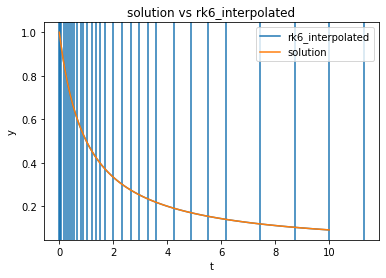

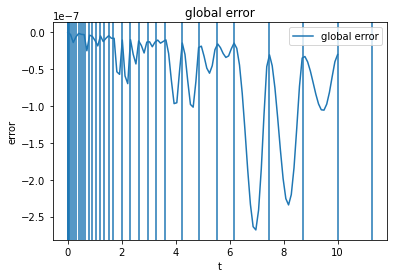

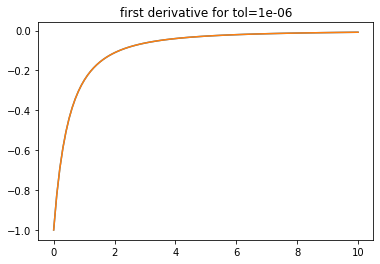

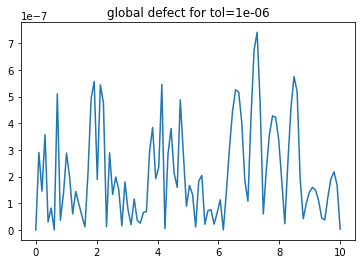

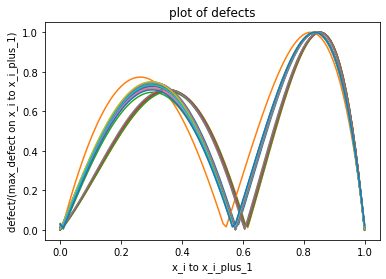

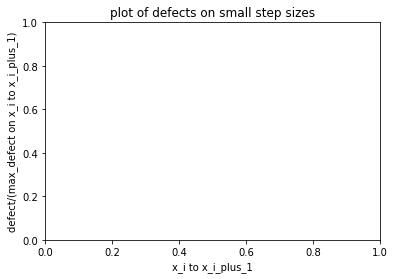

0.0
0.0
5.551115123125783e-15
3.234079670733081e-13
1.7162160581563057e-11
7.689044956293856e-10
1.1820767698011991e-09
1.4040308915497235e-09
1.5153065469064586e-09
1.561437312780356e-09
1.5688577104100432e-09
1.5533027086789275e-09
3.849318974680216e-09
3.7083286441585983e-09
4.3840091557001415e-09
4.6204364223534355e-09
4.639450601473527e-09
4.550810062120547e-09
4.410717902025851e-09
8.67260591119745e-09
1.0056715182837905e-08
1.0294056052018163e-08
1.00642283396013e-08
9.651799082188717e-09
9.18089765322705e-09
1.4623562000215529e-08
1.5785179274807604e-08
1.5507200940012567e-08
1.4755240751451737e-08
2.9714364330191145e-08
3.161710214472091e-08
3.021392758206787e-08
2.806001181410167e-08


In [9]:
t_span_6 = [0, 10]
y0_6 = [1]

def model6(t, y):
    return [-y/(t+1)]

def solution6(t):
    return [1/(x+1) for x in t]

experiment(model6, y0_6, t_span_6, solution6)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.9999999999999997, 1.0000000000000002, 0.5000000000000002, 2.0000000000000013, 0.49999999999999967, 1.0000000000000007, 1.9999999999999987, 0.5000000000000007, 1.9999999999999973, 0.9999999999999987, 2.0, 1.0000000000000029, 0.9999999999999972]
n_steps 61
n_successful_steps 43

integration complete


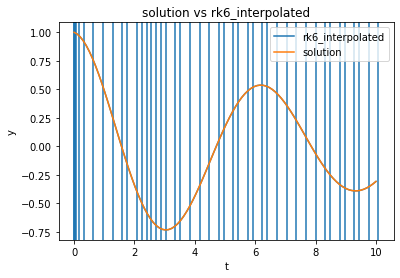

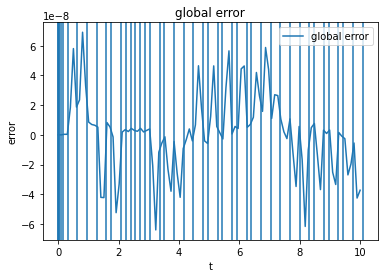

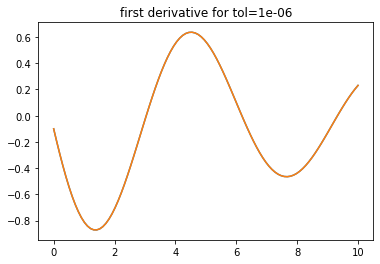

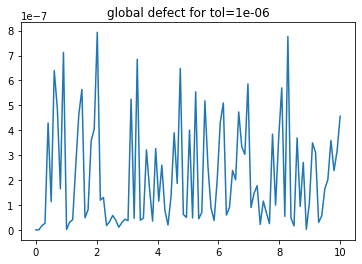

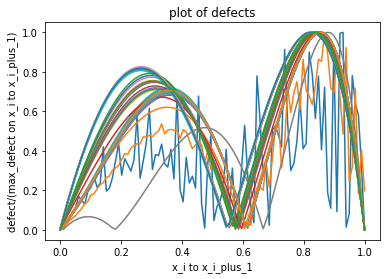

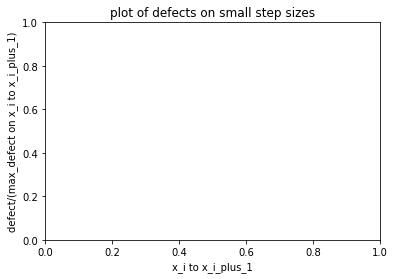

0.0
0.0
0.0
4.440892098500626e-16
2.609024107869118e-14
1.6381340728344185e-12
9.844558501725942e-11
5.244162548656561e-09
8.471041201829621e-09
9.611552997945694e-09
8.714657835640072e-09
8.545309682084223e-09
5.077599118941123e-09
4.931750730019502e-09
4.780467688370038e-09
4.625931082635759e-09
4.470364856068443e-09
4.315982682356889e-09
4.164924294336458e-09
9.181576610117759e-10
9.717082694038481e-10
4.486898075306556e-09
6.566457821932659e-09
7.1171328275276835e-09
6.2025737809778825e-09
6.07787156714501e-09
3.3593238191187424e-09
3.25610721718661e-09
4.922455221212374e-10
5.449540818602827e-10
4.396477959467404e-09
4.383697294052524e-09
7.474924457184784e-09
9.665347300291671e-09
1.0792195137554472e-08
1.0808465816802837e-08
9.780419363281112e-09
7.873946855641023e-09
7.715456940005083e-09
4.9299621052156795e-09
4.808276277135093e-09
1.8099794441006622e-09
1.7382525974163343e-09
8.203363544012632e-10
2.7714322503591404e-09


In [10]:
t_span_7 = [0, 10]
y0_7 = [1]

def model7(t, y):
    alpha = 0.1
    return [ -alpha*y - exp(-alpha*t)*sin(t)]

def solution7(t):
    alpha = 0.1
    return [exp(-alpha*x)*cos(x) for x in t]

experiment(model7, y0_7, t_span_7, solution7)

tolerance= 1e-06
alpha values [0.5, 1.0, 0.49999999999999983, 1.0000000000000002, 0.9999999999999997, 0.5000000000000002, 1.0000000000000007, 0.49999999999999967, 1.9999999999999987, 0.5000000000000007, 0.9999999999999987]
n_steps 48
n_successful_steps 35

integration complete


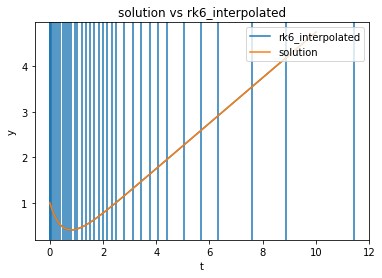

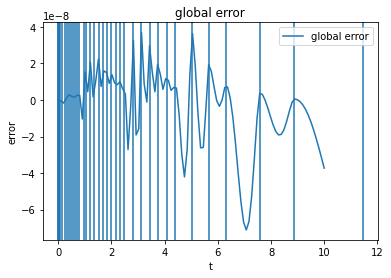

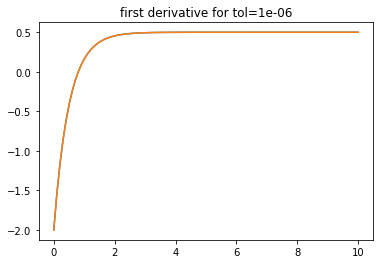

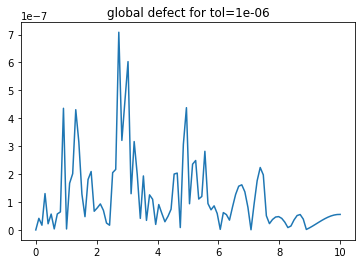

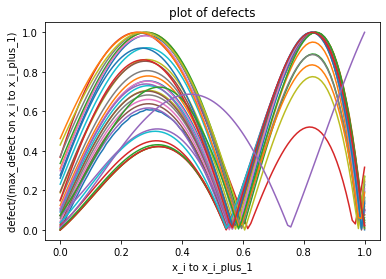

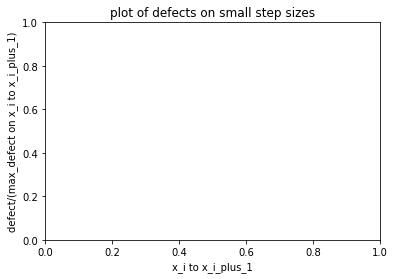

0.0
0.0
4.218847493575595e-15
3.234079670733081e-13
1.9880763701962678e-11
1.160116447351811e-09
1.9627884872974732e-09
2.5027098171648277e-09
2.8400494178626445e-09
3.0229327929731653e-09
3.0896536995506096e-09
3.0705563647259737e-09
2.989564984456905e-09
2.8653995842731206e-09
1.8869132589749427e-08
1.6275908620855262e-08
2.220718542389477e-08
2.366928186781081e-08
2.2665223475826224e-08
2.0435989678269095e-08
1.7728016388218748e-08
1.4970655048962556e-08
1.2393988835235348e-08
1.0105879688637742e-08
8.141549656670577e-09
3.842241680374059e-08
3.825635319643084e-08
2.966163159534574e-08
2.064448456629009e-08
1.3524413589038886e-08
8.522907490871034e-09
3.723296293500766e-08
2.005221677592317e-08
8.274473106695268e-09
4.195706004850308e-09
6.039817534997383e-10
4.0437274861915284e-08


In [11]:
t_span_11 = [0, 10]
y0_11 = [1]

def model11(t, y):
    return [-2*y + t]

def solution11(t):
    return [1/4 * (-1 + 5 * exp(-2 * x) + 2 * x) for x in t]

experiment(model11, y0_11, t_span_11, solution11)

In [12]:
# THE PROBLEMS BELOW CANNOT BE DONE YET
# CANNOT BE DONE AS MY CURRENT rk6 does not handle a vector for the ys
### ======================================================================


# Jeff cash test set first one

t_span_8 = [0, 10]
eps = 0.1
a = exp(-1/eps)
y0_8 = [1, a/(eps*(-1+a))]

def model8(t, y):
    return [y[1], y[0]/eps]

def solution8(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [(1-exp(x/eps)*a)/(1-a) for x in t]

experiment(model8, y0_8, t_span_8, solution8)

## the results were extremely bad. So i wanted to see the solution
plt.figure()
plt.plot(t_span_8, solution8(t_span_8))



TypeError: 'int' object is not subscriptable

In [ ]:
# Jeff cash test set second one
t_span_9 = [0, 10]
eps = 0.1
y0_9 = [1, -1/sqrt(eps)]

def model9(t, y):
    return [y[1], (y[0] + y[0]**2 - exp(-2*t/sqrt(eps)))/eps]

def solution9(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    return [exp(-x/sqrt(eps)) for x in t]

experiment(model9, y0_9, t_span_9, solution9)

In [ ]:
# Wolfram Alpha first problem

t_span_10 = [0, 10]
y0_10 = [1, 2]

def model10(t, y):
    return [y[1], -3*y[0] + 2*cos(4*t)]

def solution10(t):
    # THE experiment method calculates error on "computed[0]"
    # so we can only verify the error of y[0] there
    s = sqrt(3)
    return [(26*s*sin(s*x) - 6*cos(4*x) + 45*cos(s*x))/39 for x in t]

experiment(model10, y0_10, t_span_10, solution10)